### **Author: Niyati Jain**


## **TASK 1: PREDICTION USING SUPERVISED ML**
Predict the percentage of student based on the number of study hours.




**Importing the header files**

In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

**Get the data**

In [2]:
# Reading the data from the link
data = pd.read_csv("http://bit.ly/w-data")
#Sneak peek into the data
data.head(20)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


**Data Preprocessing**

In [3]:
data.dtypes

Hours     float64
Scores      int64
dtype: object

In [4]:
data.shape

(25, 2)

In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

**Preparing the data**

In [7]:
X = data.iloc[:, :-1].values          # Here x contains no. of hours i.e. attributes 
y = data.iloc[:, 1].values            # Here y contains scores w.r.t x i.e. labels

X.reshape(-1,1)
y.reshape(-1,1)

array([[21],
       [47],
       [27],
       [75],
       [30],
       [20],
       [88],
       [60],
       [81],
       [25],
       [85],
       [62],
       [41],
       [42],
       [17],
       [95],
       [30],
       [24],
       [67],
       [69],
       [30],
       [54],
       [35],
       [76],
       [86]])

In [8]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

**Data Visualisation**

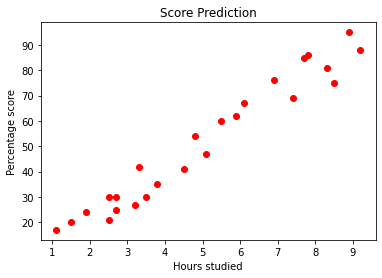

In [9]:
plt.scatter(X,y, c='r')
plt.title("Score Prediction")
plt.xlabel("Hours studied")
plt.ylabel("Percentage score")
plt.show()

The above graph clearly shows that there exists a linear relation between the number of hours studied and percentage score obtained.

**Select and train an ML algorithm**

In [10]:
from sklearn.linear_model import LinearRegression  
reg = LinearRegression()  
reg.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Plotting the regression line**

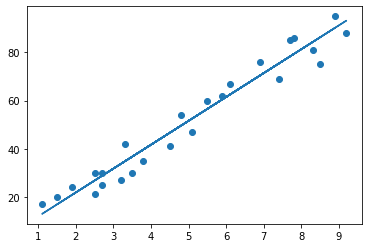

In [11]:
line = reg.coef_*X+reg.intercept_
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

**Predicting the model if no. of study hours is 9.25**

In [12]:
y_pred = reg.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [13]:
study_hour = [[9.25]]
score_prediction = reg.predict(study_hour)
print("No of hours of studying: ", study_hour)
print("Predicted Score: ", score_prediction)

No of hours of studying:  [[9.25]]
Predicted Score:  [93.69173249]


**Evaluating Score**

In [14]:
reg.score(X_train, y_train)

0.9515510725211553

In [15]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002982


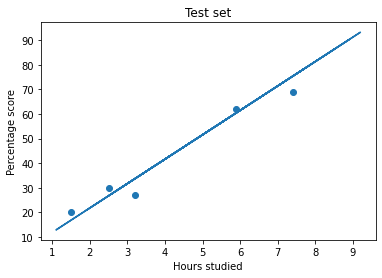

In [17]:
#Visualising the test set
plt.scatter(X_test, y_test)
plt.title("Test set")
plt.plot(X_train, reg.predict(X_train))
plt.xlabel("Hours studied")
plt.ylabel("Percentage score")
plt.show()